In [1]:
import sklearn
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('B:/ML/Notebooks/Medical Cost Personal Dataset/data/insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#for sex column
le.fit(data.sex.drop_duplicates())
data.sex = le.transform(data.sex)

#for smoker column
le.fit(data.smoker.drop_duplicates())
data.smoker = le.transform(data.smoker)

#for region column
le.fit(data.region.drop_duplicates())
data.region = le.transform(data.region)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [6]:
X = data.drop(['charges','sex','age','children','region'],axis = 1)
y = data.charges
X = np.array(X)
y = np.array(y)

In [50]:
X = data.drop(['charges','age','sex','bmi','children','region'],axis = 1)
y = data.charges
X = np.array(X)
y = np.array(y)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 2)
(268, 2)
(1070,)
(268,)


In [9]:
reg1 = ldtr(max_depth = 2)
reg2 = LinearRegression(n_jobs = -1)
reg3 = LinearSVR()
reg4 = SVR(kernel = 'linear')
reg5 = DecisionTreeRegressor(max_depth = 2)

In [10]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)

hello
1
Tree: 1 1
0 1064
0 1040
0 1070
(1064, 2) (1064,)
(1040, 2) (1040,)
0 2 438.7373918571293 35.409567047718156
0 3 5115.49358894207 -214414.8616401741
0 4 2135.2514330165636 -93993.19898011083
None
0
Tree: 0 0
1 852
0 39
0 954


DecisionTreeRegressor(max_depth=2)

In [11]:
reg2.coef_

array([  366.38810414, 23667.28481141])

In [12]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)

In [13]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred1))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred2))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred3))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred4))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred5))

Mean squared error: 137682330.18
Mean squared error: 46719387.71
Mean squared error: 150416604.69
Mean squared error: 151284524.46
Mean squared error: 34150316.15


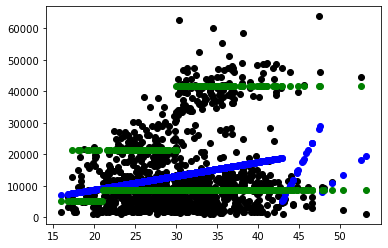

In [14]:
plt.scatter(X_train[:, 0], y_train,  color='black')
plt.scatter(X_train[:, 0], reg1.predict(X_train),  color='blue')
plt.scatter(X_train[:, 0], reg5.predict(X_train),  color='green')
plt.show()